# **Lecture 4 -- Excercises: Stochastic Gradient method**

In [51]:
#from sklearn.datasets.samples_generator import make_regression 
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np



# use vector graphics for a crisper plot!
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

C:\Users\wengang\AppData\Local\Temp\ipykernel_16988\821983932.py:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


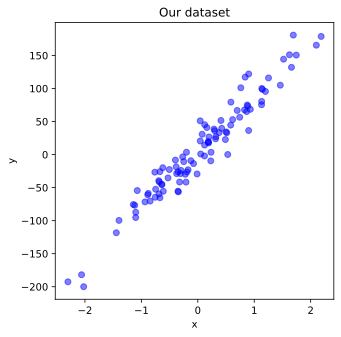

In [40]:
# generate some data sample for the demonstration
X, y = make_regression(n_samples=100, 
                       n_features=1,
                       n_informative=1,
                       noise=20,
                       random_state=1)

# create figure
fig = plt.figure(figsize=(5, 5))
# add subplot (rows, cols, number)
ax = fig.add_subplot(1, 1, 1, xlabel='x', ylabel='y')
# plot data on new axis
ax.scatter(X, y, color='blue', alpha=0.5)
ax.set_title('Our dataset')
# display plot
plt.show()

### Ex Part I: Ordinary linear algebra for coefficients
$y = a + b \times X$

In [80]:
# augment data with bias trick
N = X.shape[0]
X_bt = np.concatenate([np.ones((N, 1)), X], axis=1)

from numpy.linalg import inv
# TODO: calculate the optimal parameter vector
beta = inv(X_bt.T.dot(X_bt)).dot(X_bt.T).dot(y)
print(beta)

def mean_square_error(X, y, beta):
    # TODO: implement the quadratic loss function
    return (X.dot(beta) - y).dot(X.dot(beta) - y) / X.shape[0]

mse = mean_square_error(X_bt, y, beta)
print('MSE: %.02f RMSE: %.02f' % (mse, np.sqrt(mse)))

[ 4.05402878 82.48449929]
MSE: 332.57 RMSE: 18.24


In [81]:
#Implement a function to compute the gradient:
def evaluate_gradient(X, y, beta):
    # TODO
    return X.T.dot(X.dot(beta) - y) / X.shape[0]

from numpy.linalg import norm
print(norm(evaluate_gradient(X_bt, y, beta)))

# Now we implement a batch gradient descent algorithm
def batch_gradient_descent(X, y, lr=1e-1, max_iters=30, tol=1e-2):
    # randomly initialise beta
    N, D = X.shape
    beta = np.random.rand(D)
    # initialise histories
    losses = [mean_square_error(X, y, beta)]
    betas = [beta.copy()]

    for i in range(max_iters):
        grad = evaluate_gradient(X, y, beta)
        # TODO: update parameters beta using grad
        beta -= lr * grad
        loss = mean_square_error(X, y, beta)
        losses.append(loss)
        betas.append(beta.copy())

        if np.sqrt(grad.dot(grad)) < tol: break

    return np.array(betas), np.array(losses)

# Run batch gradient descent
betas, losses = batch_gradient_descent(X_bt, y)
print(betas[-1])

1.9020261537552727e-14
[ 4.92227244 75.40011384]


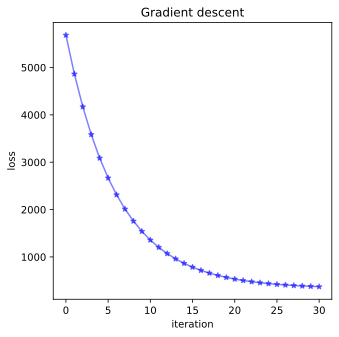

In [82]:
# Let's visualise our gradient descent:
# create figure
fig = plt.figure(figsize=(5, 5))
# add subplot (rows, cols, number)
ax = fig.add_subplot(1, 1, 1, xlabel='iteration', ylabel='loss')
# plot data on new axis
ax.plot(losses, color='blue', marker='*', alpha=0.5)
ax.set_title('Gradient descent')
# display plot
plt.show()

C:\Users\wengang\AppData\Local\Temp\ipykernel_16988\2735574229.py:18: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


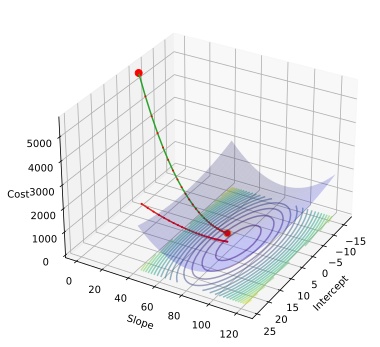

In [83]:
from mpl_toolkits.mplot3d import Axes3D

# create meshgrid
ms = np.linspace(beta[0] - 20 , beta[0] + 20, 20)
bs = np.linspace(beta[1] - 40 , beta[1] + 40, 40)
M, B = np.meshgrid(ms, bs)
zs = np.array([mean_square_error(X_bt, y, theta)
               for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

# create 3D axis object
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d', xlabel='Intercept',
                     ylabel='Slope', zlabel='Cost')

# plot mse loss hypersurface and contours
ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)

# plot start and end points
ax.plot([betas[0][0]], [betas[0][1]], [losses[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7);
ax.plot([betas[-1][0]], [betas[-1][1]], [losses[-1]] , markerfacecolor='r', marker='o', markersize=7);

# plot gradient descent curves
ax.plot(betas[:, 0], betas[:, 1], losses, markeredgecolor='r', marker='.', markersize=2);
ax.plot(betas[:, 0], betas[:, 1], 0, markeredgecolor='r', marker='.', markersize=2);

# set viewpoint
ax.view_init(elev=30, azim=30)

plt.show()


### Ex Part II: Use the sklearn library LinearRegression for coefficients
$y = a + b \times X$

In [ ]:
x_reg = X[:,np.newaxis]
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
poly = PolynomialFeatures(degree=1)
x_train = poly.fit_transform(X)
#mod = LinearRegression().fit(x_train,y)
mod = Ridge(1e-3).fit(x_train,y)
mod.coef_
fig = plt.figure(figsize=(10,8))
plt.scatter(X,y)

x_plot = np.linspace(-2,2,20)
x_plot = x_plot[:,np.newaxis]
x_test = poly.fit_transform(x_plot)
plt.plot(np.linspace(-2,2,20), mod.predict(x_test))
plt.show()

mod.intercept_, mod.coef_

### Ex Part III: Implement Gradient Descent for coefficients
$y = a + b \times X$

### Ex Part IV: Implement Stochastic Gradient Descent for coefficients
$y = a + b \times X$